## Seven Sins Restobar Analysis

#### Main Objective:
The object of this study is to perform a model for a restobar in order to see how the reviews of the clients affect rating or performance of Seven Sins Restobar
In this case we will see the data and propose some models to predict a classified models considering the reviews made by clients.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns

#### Importing data set of Seven Sins Restobar

In [2]:
df = pd.read_csv('Seven_Sins_Restobar.tsv', delimiter = '\t', quoting = 3, encoding = 'unicode_escape')

#### Visualising the data frame

In [3]:
df.head(10)

Review  Liked
0  "I also had to taste my Mom's multi-grain pump...      1
1          "I'd rather eat airline food, seriously."      0
2      Cant say enough good things about this place.      1
3                       The ambiance was incredible.      1
4          The waitress and manager are so friendly.      1
5                  I would not recommend this place.      0
6         Overall I wasn't very impressed with Noca.      0
7                My gyro was basically lettuce only.      0
8                                  Terrible service!      0
9                           Thoroughly disappointed!      0

In [92]:
Liked = df[df['Liked']==1]
No_Liked = df[df['Liked']==0]
print('Number of clients who Liked = ', len(Liked))
print('Number of clients who did not Liked = ', len(No_Liked))
print()

Number of clients who Liked =  250
Number of clients who did not Liked =  250



#### Data exploration
- Up to this point, we have a 50-50% of clients who liked and did not like, since we don't have a straight pattern or majority of likes, making a model to predict the sentiment of the text may help.

In [4]:
# Cleaning the texts

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = [] #Intialization of a new list for the 1000 reviews (corpus: collection of text)

for i in range(0, 500):
    review = re.sub('[^a-zA-Za-m]', ' ', df['Review'][i]) #Removes all but letters (and Capitals)
    review = review.lower() #Put all the letters in lowercase
    review = review.split() #Creates a list of different words
    ps = PorterStemmer() #We use Stemming for taking the root of words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) #For reversing the process (list -> string)
    corpus.append(review) #Generate a list of one string per observation

In [93]:
df.head(3)

Review  Liked
0  "I also had to taste my Mom's multi-grain pump...      1
1          "I'd rather eat airline food, seriously."      0
2      Cant say enough good things about this place.      1

In [94]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer #Class that allows tokenization

cv = CountVectorizer(max_features = 1000) #Keepong the 1000 more frequent words

X = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix

y = df.iloc[:, 1].values #Defining our response variable

In [95]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
#!pip install tabulate
from tabulate import tabulate
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [96]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# fit a Logistic Regression Model
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train, y_train)

# Fitting K-NN
from sklearn.neighbors import KNeighborsClassifier
classifier_kn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier_kn.fit(X_train, y_train)

#Fitting Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 400, criterion='entropy', random_state=0)
classifier_rf.fit(X_train, y_train)

#Fitting Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion ='entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

#Fitting kernel SVM
from sklearn.svm import SVC
classifier_sv = SVC(C=300,gamma=0.001,kernel ='rbf', random_state = 0)
classifier_sv.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = classifier_nb.predict(X_test)
lr_y_pred = classifier_lr.predict(X_test)
kn_y_pred= classifier_kn.predict(X_test)
rf_y_pred= classifier_rf.predict(X_test)
dt_y_pred = classifier_dt.predict(X_test)
sv_y_pred = classifier_sv.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

nb_cm = confusion_matrix(y_test, nb_y_pred)
print(nb_cm)

lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)

kn_cm = confusion_matrix(y_test, kn_y_pred)
print(kn_cm)

rf_cm = confusion_matrix(y_test,rf_y_pred)
print(rf_cm)

dt_cm = confusion_matrix(y_test,dt_y_pred)
print(rf_cm)

sv_cm = confusion_matrix(y_test,sv_y_pred)
print(sv_cm)


[[27 23]
 [ 6 44]]
[[35 15]
 [15 35]]
[[40 10]
 [27 23]]
[[40 10]
 [17 33]]
[[40 10]
 [17 33]]
[[37 13]
 [13 37]]


In [54]:
##Applying Grid search to find the best model and best parameters 
#from sklearn.model_selection import GridSearchCV
#parameters = [{'C': [1, 10, 100, 1000], 'kernel':['linear']},
#             {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]}]
#grid_search = GridSearchCV(estimator = classifier_sv,
#                          param_grid = parameters,
#                          scoring = 'accuracy',
#                          cv = 10,
#                          n_jobs = -1)
#grid_search = grid_search.fit(X_train, y_train)
#best_accuracy = grid_search.best_score_

In [55]:
#best_parameters = grid_search.best_params_

In [56]:
#print(best_parameters) {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [71]:
#print(best_accuracy)

0.7975


## Naive Bayes
Naive Bayes performance had an accuracy of predicting our customers review up to a 71%
But had trouble predicting the false coments assuming they were positive.
Also, this model have better performance predictin the possitive outcomes.

Text(0.5, 1.0, 'Confusion Matrix - Naive Bayes')

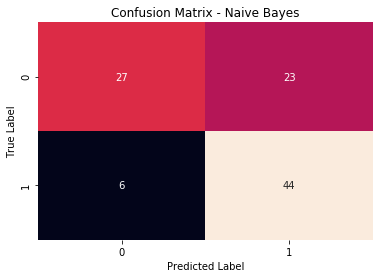

In [59]:
sns.heatmap(nb_cm,annot=True,cbar=False) 
plt.ylabel('True Label') 
plt.xlabel('Predicted Label') 
plt.title('Confusion Matrix - Naive Bayes') 

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, nb_y_pred)

              precision    recall  f1-score   support

           0       0.82      0.54      0.65        50
           1       0.66      0.88      0.75        50

   micro avg       0.71      0.71      0.71       100
   macro avg       0.74      0.71      0.70       100
weighted avg       0.74      0.71      0.70       100



0.71

## Logistic Regression
Logistic Regression performance had an accuracy of predicting our customers review up to a 70%
It had the same predicted values por the true and false positive.
Up to now this is the best model even if it has a lesser accuracy, because the false and positive outputs have the same percentage of erros, having better predictions.
Also, this model can predict better the negative outcomes.

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

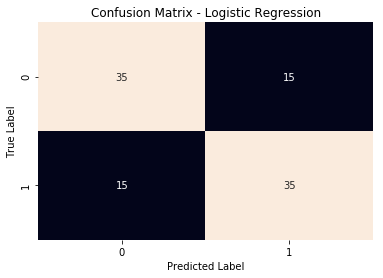

In [61]:
sns.heatmap(lr_cm,annot=True,cbar=False) 
plt.ylabel('True Label') 
plt.xlabel('Predicted Label') 
plt.title('Confusion Matrix - Logistic Regression') 

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_y_pred)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        50
           1       0.70      0.70      0.70        50

   micro avg       0.70      0.70      0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



0.7

## K-NN
K-NN performance had an accuracy of predicting our customers review up to a 63%
Even though it is the lowest accuracy of all the models,
it can predict the false negatives better than the other models

Text(0.5, 1.0, 'Confusion Matrix - K-NN')

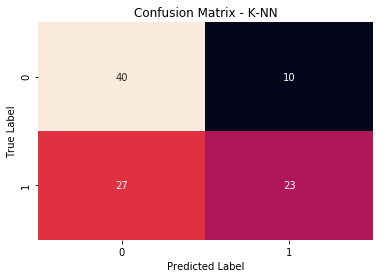

In [63]:
sns.heatmap(kn_cm,annot=True,cbar=False) 
plt.ylabel('True Label') 
plt.xlabel('Predicted Label') 
plt.title('Confusion Matrix - K-NN') 

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, kn_y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, kn_y_pred)

              precision    recall  f1-score   support

           0       0.60      0.80      0.68        50
           1       0.70      0.46      0.55        50

   micro avg       0.63      0.63      0.63       100
   macro avg       0.65      0.63      0.62       100
weighted avg       0.65      0.63      0.62       100



0.63

## Random Forest
Random forest model performance had an accuracy of predicting our customers review up to a 73%
Up to now this is the best model, having better predictions.
Also, this model can predict better the negative and positve outcomes.

Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

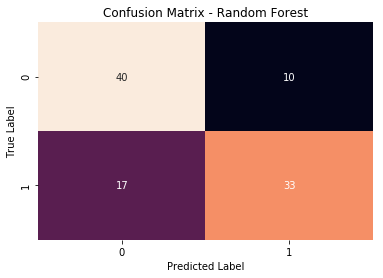

In [65]:
sns.heatmap(rf_cm,annot=True,cbar=False) 
plt.ylabel('True Label') 
plt.xlabel('Predicted Label') 
plt.title('Confusion Matrix - Random Forest') 

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rf_y_pred)

              precision    recall  f1-score   support

           0       0.70      0.80      0.75        50
           1       0.77      0.66      0.71        50

   micro avg       0.73      0.73      0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.73      0.73      0.73       100



0.73

## Decision Tree
Decision Tree model performance had an accuracy of predicting our customers review up to a 70%
This model does not perform better than the naive bayes model to predict the false positive values.
Even though this model is good, it can be tuned to perform better, for now we can go along with Naive Bayes.

Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

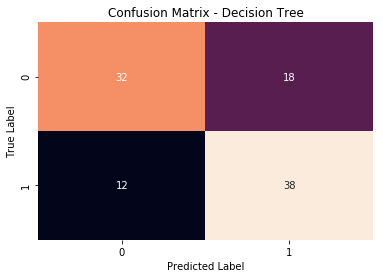

In [67]:
sns.heatmap(dt_cm,annot=True,cbar=False) 
plt.ylabel('True Label') 
plt.xlabel('Predicted Label') 
plt.title('Confusion Matrix - Decision Tree') 

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_y_pred)

              precision    recall  f1-score   support

           0       0.73      0.64      0.68        50
           1       0.68      0.76      0.72        50

   micro avg       0.70      0.70      0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



0.7

## Support Vector Machine
SVM performance had an accuracy of predicting our customers review up to a 74%
It is a great model and it performs as good as the random forest model.

Text(0.5, 1.0, 'Confusion Matrix - Support Vector Machine')

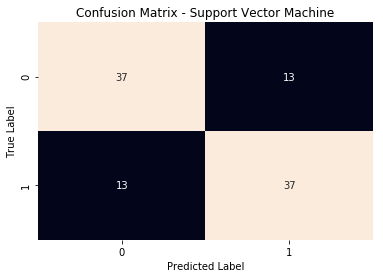

In [83]:
sns.heatmap(sv_cm,annot=True,cbar=False) 
plt.ylabel('True Label') 
plt.xlabel('Predicted Label') 
plt.title('Confusion Matrix - Support Vector Machine') 

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, sv_y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, sv_y_pred)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        50
           1       0.74      0.74      0.74        50

   micro avg       0.74      0.74      0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



0.74

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.710
Logistic: ROC AUC=0.768
Random Forest: ROC AUC=0.781


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

threshold   tpr   fpr
0        2.0  0.00  0.00
1        1.0  0.88  0.46
2        0.0  1.00  1.00

threshold   tpr   fpr
0    1.999911  0.00  0.00
1    0.999911  0.02  0.00
2    0.963908  0.10  0.00
3    0.952055  0.10  0.02
4    0.808690  0.34  0.02
5    0.794672  0.34  0.06
6    0.771599  0.40  0.06
7    0.751255  0.40  0.10
8    0.735760  0.42  0.10
9    0.733391  0.42  0.12
10   0.702609  0.52  0.12
11   0.697616  0.52  0.14
12   0.681008  0.54  0.14
13   0.676496  0.54  0.16
14   0.674784  0.56  0.16
15   0.663734  0.56  0.18
16   0.640720  0.58  0.18
17   0.634032  0.58  0.20
18   0.586230  0.64  0.20
19   0.567556  0.64  0.22
20   0.554834  0.66  0.22
21   0.544225  0.66  0.26
22   0.526270  0.70  0.26
23   0.485879  0.70  0.34
24   0.470072  0.72  0.34
25   0.466426  0.72  0.36
26   0.452494  0.76  0.36
27   0.428239  0.76  0.42
28   0.392767  0.84  0.42
29   0.381911  0.84  0.46
30   0.381492  0.86  0.46
31   0.350426  0.86  0.52
32   0.348744  0.88  0.52
33   0.320811  0.88  0.62
34   0.315424  0.90  0.62
35   0.266787  0.90  0.74
36   0.261844  0.92  0.74
37   0.253786  0.92  0.80
38   0.238886  0.94  0.80
39   0.211520  0.94  0.82
40   0.211244  0.96  0.82
41   0.155739  0.96  0.94
42   0.137476  0.98  0.94
43   0.088363  0.98  1.00
44   0.049517  1.00  1.00

threshold   tpr   fpr
0      1.9900  0.00  0.00
1      0.9900  0.02  0.00
2      0.9875  0.08  0.00
3      0.9425  0.18  0.00
4      0.9300  0.22  0.00
5      0.9200  0.26  0.00
6      0.9125  0.30  0.02
7      0.8250  0.44  0.02
8      0.8075  0.44  0.04
9      0.7625  0.50  0.04
10     0.7375  0.50  0.08
11     0.7350  0.52  0.08
12     0.7325  0.52  0.10
13     0.7025  0.56  0.10
14     0.6950  0.58  0.10
15     0.6375  0.58  0.16
16     0.5975  0.60  0.16
17     0.5800  0.60  0.18
18     0.5525  0.66  0.18
19     0.4700  0.66  0.24
20     0.4500  0.68  0.26
21     0.4450  0.68  0.28
22     0.3850  0.76  0.28
23     0.3575  0.76  0.34
24     0.2900  0.78  0.34
25     0.2625  0.78  0.36
26     0.2525  0.80  0.36
27     0.2500  0.80  0.40
28     0.1750  0.80  0.56
29     0.1700  0.82  0.56
30     0.1325  0.82  0.64
31     0.1100  0.86  0.64
32     0.1050  0.86  0.66
33     0.1025  0.86  0.70
34     0.0975  0.86  0.72
35     0.0900  0.90  0.72
36     0.0775  0.92  0.76
37     0.0700  0.94  0.76
38     0.0625  0.96  0.80
39     0.0500  0.96  0.82
40     0.0475  0.96  0.86
41     0.0275  0.96  0.94
42     0.0225  0.96  0.98
43     0.0050  1.00  0.98
44     0.0025  1.00  1.00

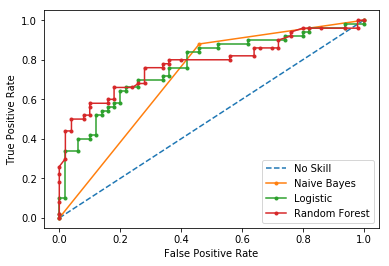

1stcutoff
LR Sensitivity: 1.0
LR Specificity: 0.0
NB Sensitivity: 0.88
NB Specificity: 0.54
RF Sensitivity: 1.0
RF Specificity: 0.0
2stcutoff
LR Sensitivity: 0.86
LR Specificity: 0.54
NB Sensitivity: 0.88
NB Specificity: 0.54
RF Sensitivity: 0.76
RF Specificity: 0.72
3stcutoff
LR Sensitivity: 0.7
LR Specificity: 0.74
NB Sensitivity: 0.88
NB Specificity: 0.54
RF Sensitivity: 0.66
RF Specificity: 0.8200000000000001
4stcutoff
LR Sensitivity: 0.4
LR Specificity: 0.9
NB Sensitivity: 0.88
NB Specificity: 0.54
RF Sensitivity: 0.5
RF Specificity: 0.96
5stcutoff
LR Sensitivity: 0.58
LR Specificity: 0.8
NB Sensitivity: 0.88
NB Specificity: 0.54
RF Sensitivity: 0.58
RF Specificity: 0.84


In [99]:
# predict probabilities
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)
rf_probs = classifier_rf.predict_proba(X_test)
#sv_probs = classifier_sv.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]
#sv_probs = sv_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
#sv_auc = roc_auc_score(y_test, sv_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
#print('Suppor Vector Machine: ROC AUC=%.3f' % (sv_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs)
#sv_fpr, sv_tpr, sv_thresholds = roc_curve(y_test, sv_probs)

#get roc curve metrics
from IPython.display import display

ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)

rf_df = pd.DataFrame(data=[])
rf_df['threshold'] = rf_thresholds
rf_df['tpr'] = rf_tpr
rf_df['fpr'] = rf_fpr
display(rf_df)

#sv_df = pd.DataFrame(data=[])
#sv_df['threshold'] = sv_thresholds
#sv_df['tpr'] = sv_tpr
#sv_df['fpr'] = sv_fpr
#display(sv_df)

# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
ax1.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
#ax1.plot(sv_fpr, sv_tpr, marker='.', label='SVM')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])
    
def evaluate_threshold_rf(threshold):
    print('RF Sensitivity:', rf_tpr[rf_thresholds > threshold][-1])
    print('RF Specificity:', 1 - rf_fpr[rf_thresholds > threshold][-1])
    
#def evaluate_threshold_sv(threshold):
    #print('SV Sensitivity:', sv_tpr[sv_thresholds > threshold][-1])
    #print('SV Specificity:', 1 - sv_fpr[sv_thresholds > threshold][-1])
    
print('1stcutoff')
evaluate_threshold_lr(5.654338e-41)
evaluate_threshold_nb(5.654338e-41)
evaluate_threshold_rf(5.654338e-41)
#evaluate_threshold_sv(5.654338e-41)
print('2stcutoff')                     
evaluate_threshold_lr(0.357685)
evaluate_threshold_nb(0.357685)
evaluate_threshold_rf(0.357685)
#evaluate_threshold_sv(0.357685)
print('3stcutoff')
evaluate_threshold_lr(0.5)
evaluate_threshold_nb(0.5)
evaluate_threshold_rf(0.5)
#evaluate_threshold_sv(0.5)

print('4stcutoff')
evaluate_threshold_lr(0.75)
evaluate_threshold_nb(0.75)
evaluate_threshold_rf(0.75)
#evaluate_threshold_sv(0.75)


print('5stcutoff')
evaluate_threshold_lr(0.60)
evaluate_threshold_nb(0.60)
evaluate_threshold_rf(0.60)
#evaluate_threshold_sv(0.60)

## Conclusions
- My first recomendation is to use the Random Forest model to predict the dataset that the clients have
- If the client wants a better prediction for positive reviews, the naive bayes can perform better.
- If the client wants a better prediction for negative reviews, logistic model can  perform better. 
- In the case of the sensitivity and specificity, for the 3rd Cutoff, naive bayes have a sensitivity of 0.88 but a specificity of 0.54, making the model not so functional for predicting considering cutoff = 0.5 nevertheless, all models considering this cutoff do not perform well.
- Considering the 0.357 cutoff is better because we can see the region where our models actually perform better.